In [1]:
from ImageProcess import ImageProcess, PPOCR_Process

from paddleocr import PaddleOCR, draw_ocr
from PIL import Image

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

/Users/haohe/opt/anaconda3/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [2]:
def plot_img(img,cmap='gray'):
    fig,ax = plt.subplots(1,1,figsize=(16,10))
    ax.imshow(img,cmap=cmap)

# Demo 1-5

In [3]:
path = '/Users/haohe/Desktop/ocr/shanghai_ocr/'
data = path+'data'
img = cv2.imread(data+'/demo_1.png')

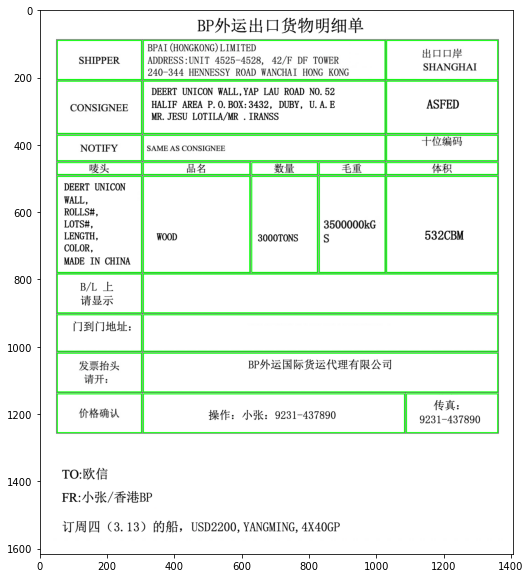

In [4]:
img_item = ImageProcess.from_table(img)
img_item.plot_boxes()

In [5]:
runner = PPOCR_Process(img,img_item.fboxes)
res = runner.postproc_run()
res

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/Users/haohe/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/haohe/.paddleocr/2.1/det/ch', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/ppocr_keys_v1.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/Users/haohe/.paddleocr/2.1/rec/ch', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
[2021/05/30 16:34:43] root INFO: dt_boxes num : 45, elapse : 1.587792158126831
[2021/05/30 16:34:44] root INFO: rec_res n

['SHIPPER ',
 'BPAI（HONGKONG)LIMITED ADDRESS:UNIT4525-4528，42/FDFTOWER 240-344HENNESSYROADWANCHAIHONG KONG ',
 '出口口岸 SHANGHAI ',
 'CONSIGNEE ',
 'DEERT UNICON WALL.YAPLAU ROAD NO.52 HALIFAREAP.O.BOX:3432.DUBY.U.A.E MR.JESULOTILA/MR.IRANSS ',
 'ASFED ',
 'NOTIFY ',
 'SAME AS CONSIGNEE ',
 '十位编码 ',
 '唛头 ',
 '',
 '数量 ',
 '毛重 ',
 '体积 ',
 'DEERT UNICON WALL， ROLLS#， LOTS#， LENGTH， COLOR， MADE IN CHINA ',
 'WOOD ',
 '3000TONS ',
 '3500000kG ',
 '532CBM ',
 'B/L上 请显示 ',
 '',
 '门到门地址： ',
 '',
 '发票拍头 请开： ',
 'BP外运国际货运代理有限公司 ',
 '价格确认 ',
 '操作：小张：9231-437890 ',
 '传真： 9231-437890 ']

In [7]:
res = runner.preproc_run()
res

[2021/05/30 14:43:45] root INFO: dt_boxes num : 1, elapse : 0.6359570026397705
[2021/05/30 14:43:45] root INFO: rec_res num  : 1, elapse : 0.019421100616455078
[2021/05/30 14:43:48] root INFO: dt_boxes num : 14, elapse : 2.532757043838501
[2021/05/30 14:43:48] root INFO: rec_res num  : 14, elapse : 0.1927626132965088
[2021/05/30 14:43:49] root INFO: dt_boxes num : 2, elapse : 1.0874052047729492
[2021/05/30 14:43:49] root INFO: rec_res num  : 2, elapse : 0.0524449348449707
[2021/05/30 14:43:50] root INFO: dt_boxes num : 1, elapse : 0.6703360080718994
[2021/05/30 14:43:50] root INFO: rec_res num  : 1, elapse : 0.029653072357177734
[2021/05/30 14:43:52] root INFO: dt_boxes num : 18, elapse : 1.7555468082427979
[2021/05/30 14:43:52] root INFO: rec_res num  : 18, elapse : 0.19835233688354492
[2021/05/30 14:43:53] root INFO: dt_boxes num : 1, elapse : 0.6203413009643555
[2021/05/30 14:43:53] root INFO: rec_res num  : 1, elapse : 0.013696908950805664
[2021/05/30 14:43:54] root INFO: dt_boxes 

['SHIPPER ',
 'BPAI （HONGKONG） LIMITED 42/F 4525-4528 DF ADDRESS:UNIT TOWER 240-344 HENNESSY WANCHAI ROAD HONG KONG ',
 '出口口岸 SHANGHAI ',
 'CONSIGNEE ',
 'WALL,YAP ROAD DEERT LAU UNICON NO.52 AREA 3432 DUBY， P.0.F HALIF BOX：3 UAE MR. JESU LOTILA/MR IRANSS ',
 'ASFED ',
 'NOTIFY ',
 'AS SAME CONSIGNEE ',
 '十位编码 ',
 '唛头 ',
 '品 名 ',
 '数量 ',
 '毛重 ',
 '体积 ',
 'DEERT UNICON WALL， ROLLS# LOTS#， LENGTH COLOR， MADE IN CHINA ',
 'WOOD ',
 '3000TONS ',
 '3500000kG S ',
 '532CBM ',
 'BL 上 请显示 ',
 '',
 '门到门地址 ',
 '',
 '发票拍头 请开 ',
 'BP外运国际货运代理有限公司 ',
 '价格确认 ',
 '操作 ： 小张： 9231-437890 ',
 '传真： 9231-437890 ']

# Demo 2

In [3]:
path = '/Users/haohe/Desktop/ocr/shanghai_ocr/'
data = path+'data'
img = cv2.imread(data+'/demo_2.png')

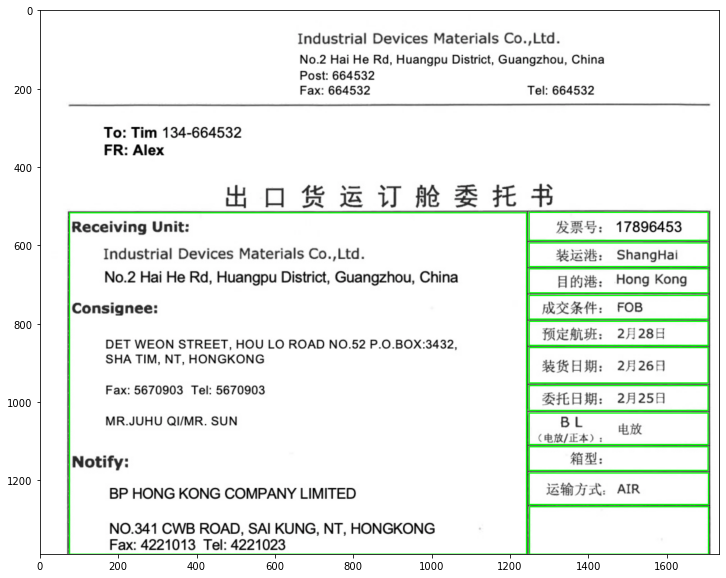

In [4]:
img_item = ImageProcess.from_table(img)
img_item.plot_boxes()

In [5]:
runner = PPOCR_Process(img,img_item.fboxes)

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/Users/haohe/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/haohe/.paddleocr/2.1/det/ch', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/ppocr_keys_v1.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/Users/haohe/.paddleocr/2.1/rec/ch', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)


In [6]:
res = runner.postproc_run()
res

[2021/05/30 16:47:24] root INFO: dt_boxes num : 37, elapse : 1.559974193572998
[2021/05/30 16:47:25] root INFO: rec_res num  : 37, elapse : 0.9379284381866455


['Receiving Unit: Industrial Devices Materials Co.，Ltd No.2HaiHe Rd，Huangpu District，Guangzhou，China Consignee: DETWEONSTREET，HOULOROADNO.52P.O.BOX:3432. SHATIM.NT,HONGKONG Fax:5670903 Tel:5670903 MR.JUHUQV/MR.SUN Notify: BPHONGKONGCOMPANYLIMITED NO.341CWBROAD.SAIKUNG，NT.HONGKONG Fax:4221013Tel:4221023 ',
 '发票号：17896453 ',
 '装运港： ShangHai ',
 'Hong Kong 目的港： ',
 '成交条件： FOB ',
 '预定航班： 2月28日 ',
 '装货日期：2月26日 ',
 '委托日期： 2月25日 ',
 'BL 电放 （电放/正本）： ',
 '箱型： ',
 '运输方式：AIR ',
 '']

In [7]:
res = runner.preproc_run()
res

[2021/05/30 16:47:30] root INFO: dt_boxes num : 21, elapse : 3.089808225631714
[2021/05/30 16:47:31] root INFO: rec_res num  : 21, elapse : 0.6527509689331055
[2021/05/30 16:47:34] root INFO: dt_boxes num : 2, elapse : 2.91394305229187
[2021/05/30 16:47:34] root INFO: rec_res num  : 2, elapse : 0.031976938247680664
[2021/05/30 16:47:38] root INFO: dt_boxes num : 2, elapse : 3.288121223449707
[2021/05/30 16:47:38] root INFO: rec_res num  : 2, elapse : 0.02467203140258789
[2021/05/30 16:47:41] root INFO: dt_boxes num : 4, elapse : 2.8645308017730713
[2021/05/30 16:47:41] root INFO: rec_res num  : 4, elapse : 0.049117088317871094
[2021/05/30 16:47:44] root INFO: dt_boxes num : 2, elapse : 2.9099199771881104
[2021/05/30 16:47:44] root INFO: rec_res num  : 2, elapse : 0.024996042251586914
[2021/05/30 16:47:47] root INFO: dt_boxes num : 3, elapse : 3.0192630290985107
[2021/05/30 16:47:47] root INFO: rec_res num  : 3, elapse : 0.0359039306640625
[2021/05/30 16:47:49] root INFO: dt_boxes num :

['Receiving Unit: Industrial Devices MaterialsCo.Ltd No.2HaiHeRd，HuangpuDistrict，（ Guangzhou，China Consignee DETWEONSTREET,HOULOROADNO.52P.O.BOX:3432 SHATIM.NT.HONGKONG Fax:5670903 Tel:5670903 MR.JUHU QI/MR.SUN Notify: BPHONGKONG COMPANYLIMITED NO.341CWB ROAD.SAIKUNG.NT.HONGKONG Fax: 4221013 Tel:4221023 ',
 '发票号： 17896453 ',
 '装运港： ShangHai ',
 'Hong gKong 目的港： ',
 '成交条件： FOB ',
 '预定航班： 2月28日 ',
 '装货日期： 2月26 5日 ',
 '委托日期： 2月25日 ',
 'BL 电放 电放/正本） ',
 '箱型： ',
 '运输方式： AIR ',
 '']

# Demo 3

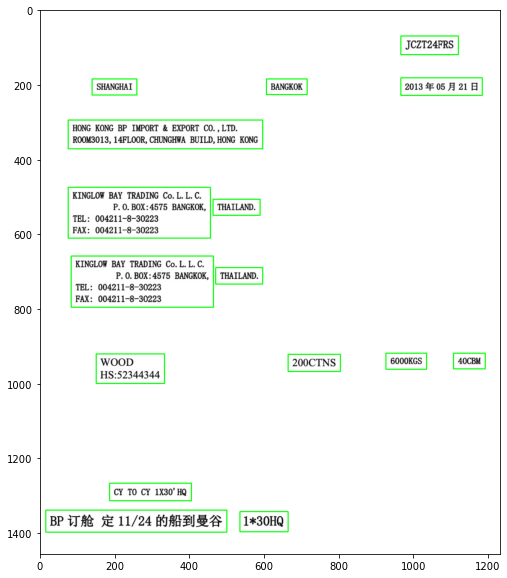

In [12]:
img = cv2.imread(data+'/demo_3.png')
img_item = ImageProcess.from_page(img)
img_item.plot_boxes()

In [13]:
runner = PPOCR_Process(img,img_item.fboxes)
res = runner.postproc_run()
res

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/Users/haohe/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/haohe/.paddleocr/2.1/det/ch', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/ppocr_keys_v1.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/Users/haohe/.paddleocr/2.1/rec/ch', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
[2021/05/30 16:49:16] root INFO: dt_boxes num : 24, elapse : 1.2207200527191162
[2021/05/30 16:49:17] root INFO: rec_res 

['JCZT24FRS ',
 '2013年05月21日 ',
 'SHANGHAI ',
 'BANGKOK ',
 'HONGKONGBPIMPORT&EXPORTCO.LTD ROOM3013.14FLOOR.CHUNGHWABUILDHONGKONG ',
 'KINGLOWBAY TRADING CO.LL.C P.O.BOX:4575BANGKOK， TEL：004211-8-30223 FAX：004211-8-30223 ',
 'THATLAND ',
 'KINGLOW BAY TRADING Co.L.L.C. P.0.BOX:4575BANGKOK TEL：004211-8-30223 FAX：004211-8-30223 ',
 'THAILAND ',
 '6000KGS ',
 '40CBM ',
 'WOOD HS：52344344 ',
 '200CTNS ',
 'CYTO CY1X30°HQ ',
 'BP订舱定11/24的船到曼谷 ',
 '1*30HQ ']

In [14]:
res = runner.preproc_run()
res

[2021/05/30 16:49:27] root INFO: dt_boxes num : 1, elapse : 1.0419857501983643
[2021/05/30 16:49:27] root INFO: rec_res num  : 1, elapse : 0.014853239059448242
[2021/05/30 16:49:29] root INFO: dt_boxes num : 3, elapse : 1.5092029571533203
[2021/05/30 16:49:29] root INFO: rec_res num  : 3, elapse : 0.03715395927429199
[2021/05/30 16:49:30] root INFO: dt_boxes num : 1, elapse : 0.8501377105712891
[2021/05/30 16:49:30] root INFO: rec_res num  : 1, elapse : 0.01582479476928711
[2021/05/30 16:49:31] root INFO: dt_boxes num : 2, elapse : 0.7542979717254639
[2021/05/30 16:49:31] root INFO: rec_res num  : 2, elapse : 0.027375221252441406
[2021/05/30 16:49:34] root INFO: dt_boxes num : 15, elapse : 2.750014066696167
[2021/05/30 16:49:34] root INFO: rec_res num  : 15, elapse : 0.18243718147277832
[2021/05/30 16:49:35] root INFO: dt_boxes num : 10, elapse : 1.0211691856384277
[2021/05/30 16:49:35] root INFO: rec_res num  : 10, elapse : 0.16488981246948242
[2021/05/30 16:49:36] root INFO: dt_boxes

['JCZT24FRS ',
 '2013年05 5月21 1日 ',
 'SHANGHAI ',
 'BANGKOK ',
 'BP IMPORT EXPORT CO. KONG HONG & LTD ROOM3013，14FLOOR，CHUNGHWA BUILD， HONG KONG ',
 'BAY KINGLOW TRADING Co.L.L.C. P.0.BOX:4575 BANGKOK TEL： 004211-8-30223 FAX: 004211-8-30223 ',
 'THAILAND. ',
 'BAY KINGLOW TRADING Co.L.L.C. P.0.BOX:4575 BANGKOK TEL： 004211-8-30223 FAX： 004211-8-30223 ',
 'THAILAND. ',
 '6000KGS ',
 '40CBM ',
 'WOOD HS：52344344 ',
 '200CTNS ',
 '1X30 TO CY CY HQ ',
 '11/24的船到曼谷 BP订舱 定1 ',
 '1*30HQ ']

# Demo 4

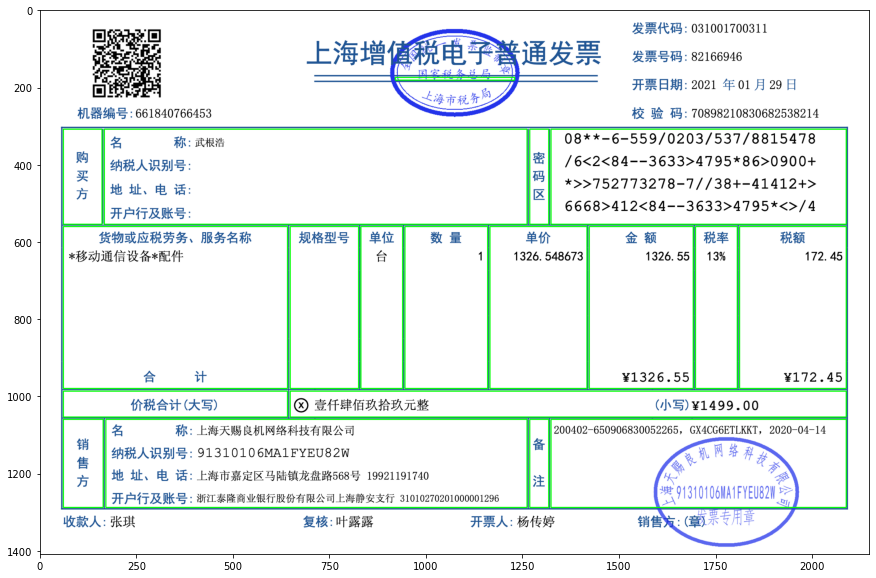

In [19]:
img = cv2.imread(data+'/demo_4.png')
img_item = ImageProcess.from_table(img)
img_item.plot_boxes()

In [20]:
runner = PPOCR_Process(img,img_item.fboxes)
res = runner.postproc_run()
res

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/Users/haohe/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/haohe/.paddleocr/2.1/det/ch', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/ppocr_keys_v1.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/Users/haohe/.paddleocr/2.1/rec/ch', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
[2021/05/30 16:52:30] root INFO: dt_boxes num : 73, elapse : 2.440977096557617
[2021/05/30 16:52:32] root INFO: rec_res n

['',
 '购 买 方 ',
 '名 称：武根浩 纳税人识别号： 地址、电话： 开户行及账号： ',
 '密 码 区 ',
 '08**-6-559/0203/537/8815478 /6<2<84--3633>4795*86>0900+ *>>752773278-7//38+-41412+> 6668>412<84--3633>4795*<>/4 ',
 '货物或应税劳务、服务名称 *移动通信设备配件 合计 ',
 '规格型号 ',
 '单位 台 ',
 '数量 ',
 '单价 1326.548673 ',
 '金额 1326.55 ￥1326.55 ',
 '税率 13% ',
 '税额 172.45 ￥172.45 ',
 '价税合计（大写） ',
 '壹仟肆佰玖拾玖元整 （小写）￥1499.00 ',
 '销 售 方 ',
 '名 称：上海天赐良机网络科技有限公司 纳税人识别号：91310106MA1FYEU82W 地址、电话：上海市嘉定区马陆镇龙盘路568号19921191740 开户行及账号：浙江泰隆商业银行股份有限公司上海静安支行31010270201000001296 ',
 '备 注 ',
 '200402-650906830052265， GX4CG6ETLKKT， 2020-04-14 络 科， 91310106MA1FYEU82W ']

In [21]:
res = runner.preproc_run()
res

[2021/05/30 16:53:13] root INFO: dt_boxes num : 0, elapse : 13.302541255950928
[2021/05/30 16:53:13] root INFO: rec_res num  : 0, elapse : 0
[2021/05/30 16:53:13] root INFO: dt_boxes num : 4, elapse : 0.715162992477417
[2021/05/30 16:53:13] root INFO: rec_res num  : 4, elapse : 0.01949906349182129
[2021/05/30 16:53:15] root INFO: dt_boxes num : 5, elapse : 1.484241008758545
[2021/05/30 16:53:15] root INFO: rec_res num  : 5, elapse : 0.0864560604095459
[2021/05/30 16:53:17] root INFO: dt_boxes num : 3, elapse : 1.8184618949890137
[2021/05/30 16:53:17] root INFO: rec_res num  : 3, elapse : 0.015081167221069336
[2021/05/30 16:53:18] root INFO: dt_boxes num : 4, elapse : 1.1507298946380615
[2021/05/30 16:53:19] root INFO: rec_res num  : 4, elapse : 0.23239707946777344
[2021/05/30 16:53:19] root INFO: dt_boxes num : 6, elapse : 0.5450749397277832
[2021/05/30 16:53:19] root INFO: rec_res num  : 6, elapse : 0.16487503051757812
[2021/05/30 16:53:20] root INFO: dt_boxes num : 1, elapse : 0.6885

['',
 '购 买 方 ',
 '名 称：武根浩 纳税人识别号 地址、电话 开户行及账号 ',
 '密 码 ',
 '08**-6-559/0203/537/8815478 /6<2<84--3633>4795*86>0900+ *>>752773278-7//38+-41412+> 6668>412<84--3633>4795*<>/4 ',
 '货物或应税劳务、 服务名称 *移动通信设备配件 合 计 ',
 '规格型号 ',
 '单位 台 ',
 '数量 1 ',
 '单价 1326.548673 ',
 '金额 1326.55 ￥1326.5 ',
 '税率 13% ',
 '税额 172.45 ￥172.45 ',
 '价税合计（大写） ',
 '壹仟肆佰玖拾玖元整 （小写）￥1499 00 X ',
 '销 售 方 ',
 '名 称：上海天赐良机网络科技有限公司 纳税人识别号：91310106MA1FYEU82W 地址、电话：上海市嘉定区马陆镇龙盘路568号 19921191740 开户行及账号：浙江泰隆商业银行股份有限公司上海静安支行 31010270201000001296 ',
 '备 注 ',
 '200402-650906830052265 GX4CG6ETLKKT 2020-04-14 无 限公司 海 91310106MA1FYEU82W ']

# Fin